In [ ]:
# Let's build a couple of autoencoders
# https://blog.keras.io/building-autoencoders-in-keras.html

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Dense,  Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras import regularizers

from tensorflow.keras import backend as K

In [4]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [5]:
## Simplest example

# this is the size of our encoded representations
encoding_dim = 10  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [7]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [8]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')
autoencoder.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 784)               8624      
Total params: 16,474
Trainable params: 16,474
Non-trainable params: 0
_________________________________________________________________


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3242 - val_loss: 0.2395
Epoch 2/100
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2173 - val_loss: 0.1963
Epoch 3/100
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1892 - val_loss: 0.1809
Epoch 4/100
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1779 - val_loss: 0.1725
Epoch 5/100
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1714 - val_loss: 0.1676
Epoch 6/100
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1677 - val_loss: 0.1650
Epoch 7/100
60000/60000 [==============================] - 6s 104us/sample - loss: 0.1655 - val_loss: 0.1632
Epoch 8/100
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1638 - val_loss: 0.1617
Epoch 9/100
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1

KeyboardInterrupt: 

In [8]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

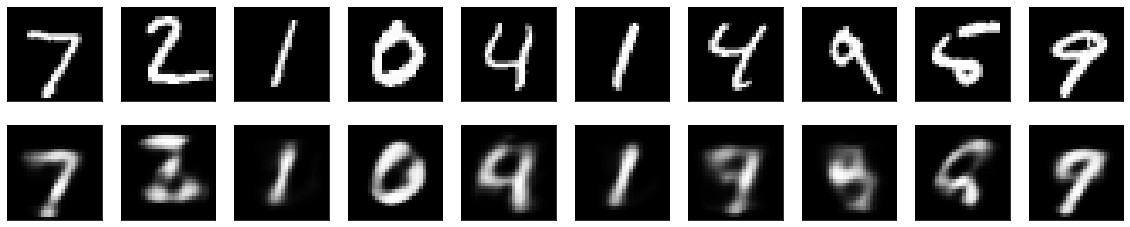

In [9]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Adding sparsity to avoid just reproducing PCA
#encoding_dim = 32

#input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
#encoded = Dense(encoding_dim, activation='relu',
#                activity_regularizer=regularizers.l1(10e-5))(input_img)
#decoded = Dense(784, activation='sigmoid')(encoded)

#autoencoder2 = Model(input_img, decoded)

In [ ]:
# this model maps an input to its encoded representation
#encoder2 = Model(input_img, encoded)

In [ ]:
# create a placeholder for an encoded (32-dimensional) input
#encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
#decoder_layer = autoencoder2.layers[-1]
# create the decoder model
#decoder2 = Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
#autoencoder2.compile(optimizer='adadelta', loss='binary_crossentropy')
#autoencoder2.summary()

In [ ]:
#autoencoder2.fit(x_train, x_train,
#                epochs=100,
#                batch_size=256,
#                shuffle=True,
#                validation_data=(x_test, x_test))

In [ ]:
#encoded_imgs2 = encoder2.predict(x_test)
#decoded_imgs2 = decoder2.predict(encoded_imgs2)

In [ ]:
#n = 10  # how many digits we will display
#plt.figure(figsize=(20, 4))
#for i in range(n):
    # display original
#    ax = plt.subplot(2, n, i + 1)
#    plt.imshow(x_test[i].reshape(28, 28))
#    plt.gray()
#    ax.get_xaxis().set_visible(False)
#    ax.get_yaxis().set_visible(False)

    # display reconstruction
#    ax = plt.subplot(2, n, i + 1 + n)
#    plt.imshow(decoded_imgs2[i].reshape(28, 28))
#    plt.gray()
#    ax.get_xaxis().set_visible(False)
#    ax.get_yaxis().set_visible(False)
#plt.show()

In [ ]:
#ideally: not much of a difference to before. but more sparse representation

In [10]:
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))

decoded = Dense(64, activation='relu')(encoded_input)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

decoder = Model(encoded_input,decoded)

x=encoder(input_img)
autoencoder=decoder(x)

autoencoder=Model(input_img,autoencoder)

In [11]:
autoencoder.summary()
encoder.summary()
decoder.summary()

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
model_3 (Model)              (None, 32)                110816    
_________________________________________________________________
model_4 (Model)              (None, 784)               111568    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
_________________________________________________________________
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
____________________________________

In [21]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.3472 - val_loss: 0.2612
Epoch 2/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.2493 - val_loss: 0.2355
Epoch 3/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.2219 - val_loss: 0.2127
Epoch 4/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.2026 - val_loss: 0.1926
Epoch 5/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.1873 - val_loss: 0.1840
Epoch 6/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.1809 - val_loss: 0.1768
Epoch 7/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.1751 - val_loss: 0.1700
Epoch 8/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1685 - val_loss: 0.1639
Epoch 9/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.1630 - val_loss: 0.1

KeyboardInterrupt: 

In [22]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

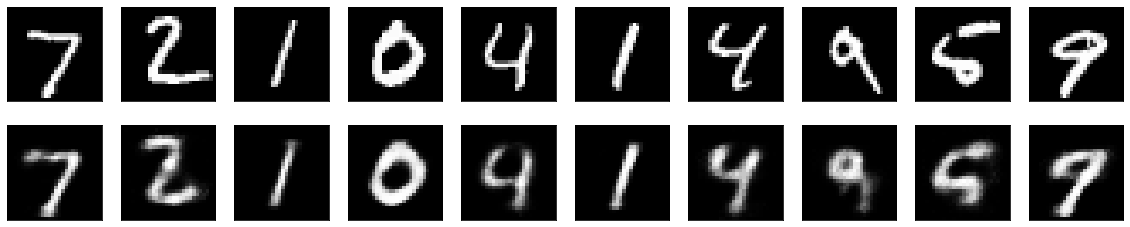

In [23]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [24]:

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [25]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0         
__________

In [4]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format


In [5]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 9s 147us/step - loss: 25.2977 - val_loss: 18.8700
Epoch 2/50
60000/60000 [==============================] - 6s 96us/step - loss: 18.4390 - val_loss: 16.8789
Epoch 3/50
60000/60000 [==============================] - 6s 95us/step - loss: 16.8952 - val_loss: 15.9080
Epoch 4/50
60000/60000 [==============================] - 6s 96us/step - loss: 16.0193 - val_loss: 14.9241
Epoch 5/50
60000/60000 [==============================] - 6s 94us/step - loss: 15.4453 - val_loss: 14.7453
Epoch 6/50
60000/60000 [==============================] - 6s 95us/step - loss: 15.1361 - val_loss: 14.4490
Epoch 7/50
60000/60000 [==============================] - 6s 96us/step - loss: 14.9088 - val_loss: 14.3431
Epoch 8/50
60000/60000 [==============================] - 6s 95us/step - loss: 14.7224 - val_loss: 13.9737
Epoch 9/50
60000/60000 [==============================] - 6s 95us/step - loss: 14.5554 - val_

In [12]:
decoded_imgs = autoencoder.predict(x_test)

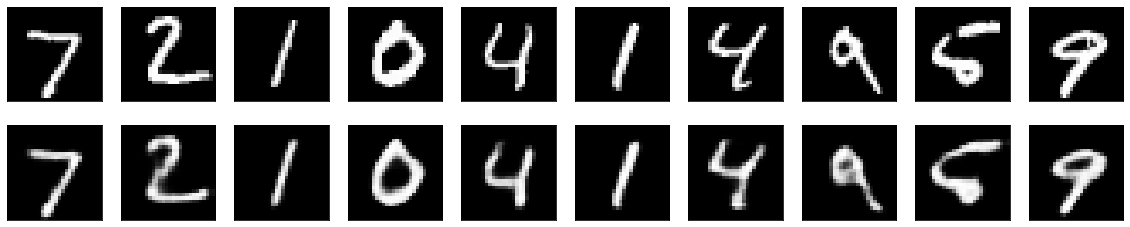

In [13]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.clf()

In [26]:
# Denoising

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

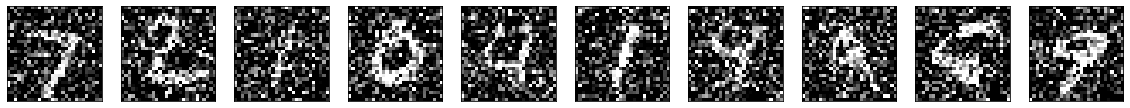

In [27]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [23]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [26]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 87us/step - loss: 12.2781 - val_loss: 12.1360
Epoch 2/100
60000/60000 [==============================] - 5s 86us/step - loss: 12.2374 - val_loss: 12.1531
Epoch 3/100
60000/60000 [==============================] - 5s 87us/step - loss: 12.2492 - val_loss: 12.0532
Epoch 4/100
60000/60000 [==============================] - 5s 86us/step - loss: 12.2340 - val_loss: 12.0829
Epoch 5/100
60000/60000 [==============================] - 5s 86us/step - loss: 12.2005 - val_loss: 12.1512
Epoch 6/100
60000/60000 [==============================] - 5s 88us/step - loss: 12.2009 - val_loss: 12.0408
Epoch 7/100
60000/60000 [==============================] - 5s 87us/step - loss: 12.1953 - val_loss: 12.0599
Epoch 8/100
60000/60000 [==============================] - 5s 86us/step - loss: 12.1737 - val_loss: 12.0195
Epoch 9/100
60000/60000 [==============================] - 5s 85us/step - loss: 12.152

KeyboardInterrupt: 

In [27]:
decoded_imgs = autoencoder.predict(x_test_noisy)

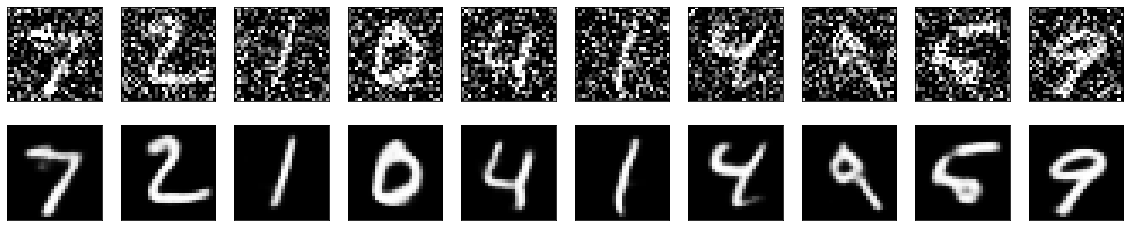

In [28]:
# add images here

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()